## Ramon Brand - Session 2 - NMist with own images
### Overview
The idea of this exercise is to train a neural network using the nmist dataset, and then use the network to predict own hand drawn number images.

The first part of the exercise will be to train the network using some various configurations to see how we can get a reasonably accurate result using the given nmist test data.

Secondly, we will read in our own images, and plot them to see how they look, and process the data as we see fit.

Lastly, our own images will be passed into the network we created in the first step, to predict the number they represent.

### Part 1 - Training the network
The first try is with a simple one layer network.

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# -- Load Data File
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# -- Shuffle
state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(state)
np.random.shuffle(y_train)
state = np.random.get_state()
np.random.shuffle(x_test)
np.random.set_state(state)
np.random.shuffle(y_test)

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Reshape
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Create model
model = Sequential()
model.add(Dense(10, input_shape=(28 * 28,), activation="softmax"))
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 1.0035 - acc: 0.7654
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.5567 - acc: 0.8638
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.4751 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.4354 - acc: 0.8846
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.4110 - acc: 0.8898
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3939 - acc: 0.8932
Epo

We get an accuracy of 0.91 with one layer. This is not too bad, but I think we can do better without going crazy with layers.


In [11]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# -- Load Data File
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# -- Shuffle
state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(state)
np.random.shuffle(y_train)
state = np.random.get_state()
np.random.shuffle(x_test)
np.random.set_state(state)
np.random.shuffle(y_test)

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Reshape
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Create model
model = Sequential()

# -- First layer
model.add(Dense(400, input_shape=(28 * 28,), activation="relu"))

# -- Second layer
model.add(Dense(100, input_shape=(400,), activation="relu"))

# -- Last layer
model.add(Dense(10, input_shape=(100,), activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_36 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.7480 - acc: 0.8217
Epoch 2/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.3401 - acc: 0.9044
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2856 - acc: 0.9186
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.2529 - acc: 0.9280


Here we are able to get an accuracy of 0.95, which is sufficient for now.

### Part 2 - Loading own images

In [8]:
import numpy as np
from keras.preprocessing.image import load_img

img = load_img("tldot.png")
imgData = np.array(img)

print(imgData)

[[[  0   0   0]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[105 105 105]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


The image has one black pixel in the top left and one grey pixel in the bottom left. This will allow us to confirm the order, as in either arrays of rows or arrays of columns. We can see the grey pixel in the first element of the last parent element, meaning the data is an array containing horizontal rows.

Since load_img always loads rgb even when the image is only grayscale, we will just use the first element of the array. We will also divide the values by 255 after we convert it to floats.

In [12]:
import numpy as np
from keras.preprocessing.image import load_img

# -- Load image
img = load_img("tldot.png")
imgData = np.array(img)

# -- Use only first element of deepest child
imgDataCut = imgData[:,:,0]

# -- Change type
imgDataCut = imgDataCut.astype('float32')

# -- Normalize
imgDataCut /= 255

print(imgDataCut[0]) # -- First row
print(imgDataCut[1]) # -- Second row <- Same as all middle rows for this example
print(imgDataCut[-1])# -- Last row

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.4117647 1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.       ]


Notice the black pixel in the first row, and the grey pixel in the last row.

We can also plot the image to be sure. Here we plot some of our test images also.

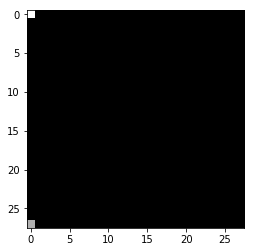

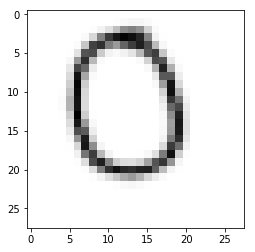

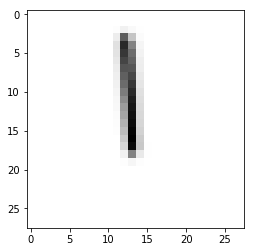

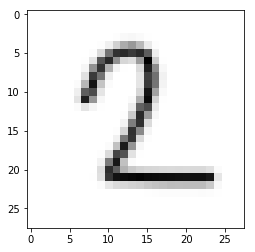

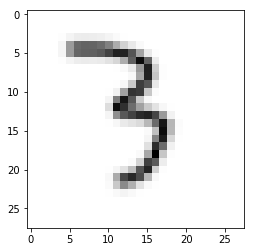

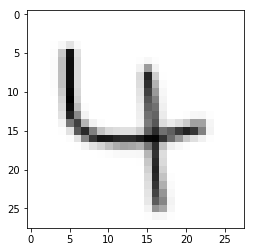

In [23]:
%matplotlib inline

import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# -- Load image
img = load_img("tldot.png")
imgData = np.array(img)

# -- Use only first element of deepest child
imgDataCut = imgData[:,:,0]

# -- Change type
imgDataCut = imgDataCut.astype('float32')

# -- Normalize
imgDataCut /= 255

# -- Plot
plt.imshow(imgDataCut, cmap="Greys")
plt.show()

# -- Lets do this for some of our test images
for x in range(0, 5):
    # -- Load image
    img = load_img("sample_" + str(x) + ".png")
    imgData = np.array(img)

    # -- Use only first element of deepest child
    imgDataCut = imgData[:,:,0]

    # -- Change type
    imgDataCut = imgDataCut.astype('float32')

    # -- Normalize
    imgDataCut /= 255

    # -- Plot
    plt.imshow(imgDataCut, cmap="Greys")
    plt.show()


Just to be sure the actual mnist images are similar. We plot some mnist images below.

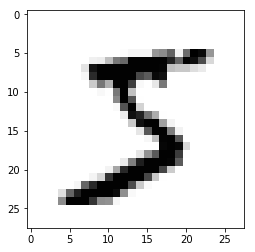

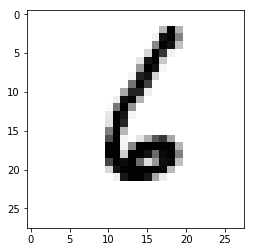

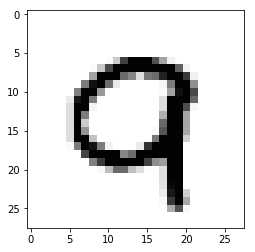

In [24]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# -- Load Data File
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# -- Change type
x_test = x_test.astype('float32')

# -- Reshape
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# -- Normalize
x_test /= 255

# -- Plot
plt.imshow(x_train[0], cmap="Greys")
plt.show()
plt.imshow(x_train[1553], cmap="Greys")
plt.show()
plt.imshow(x_train[33252], cmap="Greys")
plt.show()

By doing this, we can see that the mnist images are a little more 'beefy' and bold, so we should consider this if the results are not as we expect them to be.

### Part 3 - Prediction

In [21]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# -- Load Data File
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# -- Shuffle
state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(state)
np.random.shuffle(y_train)
state = np.random.get_state()
np.random.shuffle(x_test)
np.random.set_state(state)
np.random.shuffle(y_test)

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Reshape
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Create model
model = Sequential()

# -- First layer
model.add(Dense(400, input_shape=(28 * 28,), activation="relu"))

# -- Second layer
model.add(Dense(100, input_shape=(400,), activation="relu"))

# -- Last layer
model.add(Dense(10, input_shape=(100,), activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

# --------------------------------- Predictions

x_predictions = None

# -- Lets do this for some of our test images
for x in range(0, 10):
    # -- Load image
    img = load_img("sample_" + str(x) + ".png")
    imgData = np.array(img)

    # -- Use only first element of deepest child
    imgDataCut = imgData[:,:,0]

    # -- Change type
    imgDataCut = imgDataCut.astype('float32')

    # -- Normalize
    imgDataCut /= 255
    
    # -- Flatten array to match
    imgDataCut = imgDataCut.flatten()
    
    if x_predictions is None:
        x_predictions = [imgDataCut]
    else:
        x_predictions = np.concatenate((x_predictions, [imgDataCut]))
    
predictionResult = model.predict(x_predictions)    

predictionHotIndex = np.argmax(predictionResult, axis=1)

print("Target: [0 1 2 3 4 5 6 7 8 9]")
print("Result: " + str(predictionHotIndex))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_62 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.8002 - acc: 0.7995
Epoch 2/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.3412 - acc: 0.9057
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.2833 - acc: 0.9196
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2494 - acc: 0.9294


### Result
Here we have the result. 5 from the 10 images were predicted correctly. This is not to great, however I have had runs where there were up to 7 correct. It is interesting though, because the mistakes do somewhat make sense.

If we look at the fact that the 7  was predicted as a 3, it can be seen how this is possible, since the 7 has the middle horizontal line, and the back of the 7 is slightly curved, it really does look like a 3 in a way.